In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import *#norm
import seaborn as sns
sns.set()
sns.set_palette("BuGn_r",n_colors=20)

# category vs contin.

In [23]:
x = ['hated','dissatisfied','neutral','satisfied','very satisfied']
y = np.random.randint(10,100,size=5)

xx = np.linspace(100,250,100)
yy = norm.pdf(xx ,loc=170, scale=5)

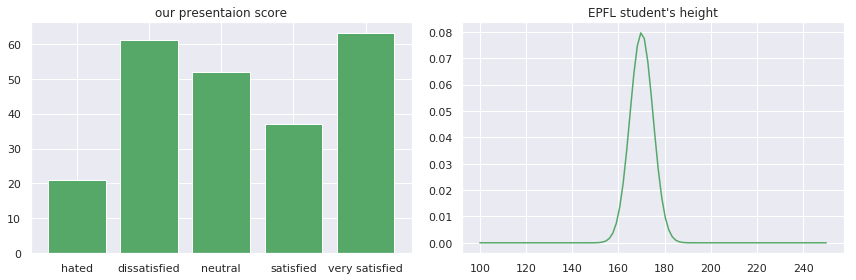

In [24]:
fig,Ax = plt.subplots(1,2,figsize=(12,4))
Ax[0].bar(x,y, color='g')
Ax[1].plot(xx,yy, color='g')
Ax[0].set_title('our presentaion score')
Ax[1].set_title('EPFL student\'s height')
plt.tight_layout()
plt.savefig('cat-vs-dist.png')

# Body temp

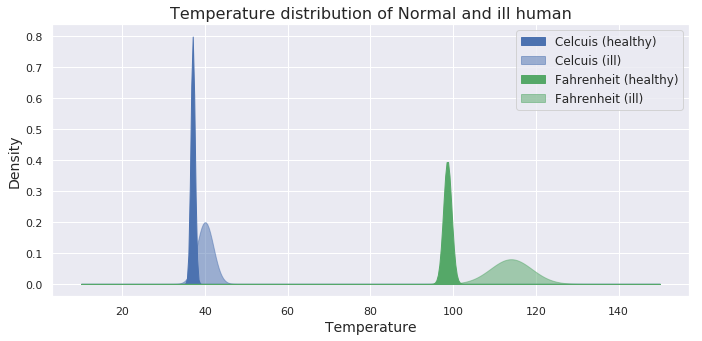

In [175]:
x = np.linspace(10,150,400)
plt.figure(figsize=(10,5))
plt.fill_between(x,0,norm.pdf(x,loc=37, scale=0.5),color='b', label='Celcuis (healthy)')
plt.fill_between(x,0,norm.pdf(x,loc=40, scale=2), alpha=0.5,color='b', label='Celcuis (ill)')

plt.fill_between(x,0,norm.pdf(x,loc=98.6, scale=1),color='g', label='Fahrenheit (healthy)')
plt.fill_between(x,0,norm.pdf(x,loc=114, scale=5), alpha=0.5,color='g', label='Fahrenheit (ill)')

plt.legend(fontsize=12)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Temperature distribution of Normal and ill human', fontsize=16)
plt.tight_layout()

plt.savefig('body-temp.png')

# cumulative vs dist

In [176]:
x = np.linspace(0,120,200)
pdf = norm.pdf(x,loc=37, scale=5)*10
cdf = norm.cdf(x,loc=37, scale=5)

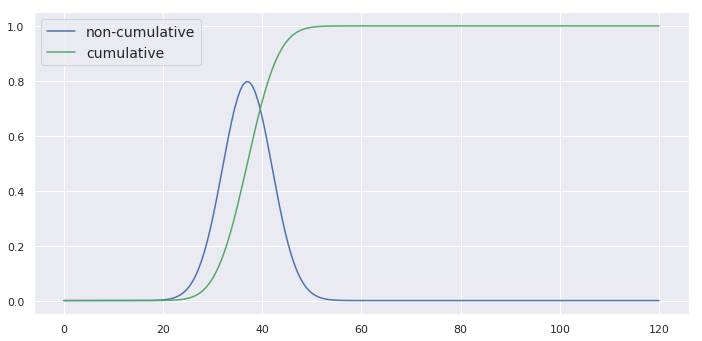

In [177]:
plt.figure(figsize=(10,5))
plt.plot(x,pdf, color='b', label='non-cumulative')
plt.plot(x,cdf, color='g', label='cumulative')

plt.legend(fontsize=14)
plt.tight_layout()

plt.savefig('cumulatives.png')

# dynamics

/home/arash/miniconda3/envs/Deeption/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/arash/miniconda3/envs/Deeption/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/arash/miniconda3/envs/Deeption/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/home/arash/miniconda3/envs/Deeption/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


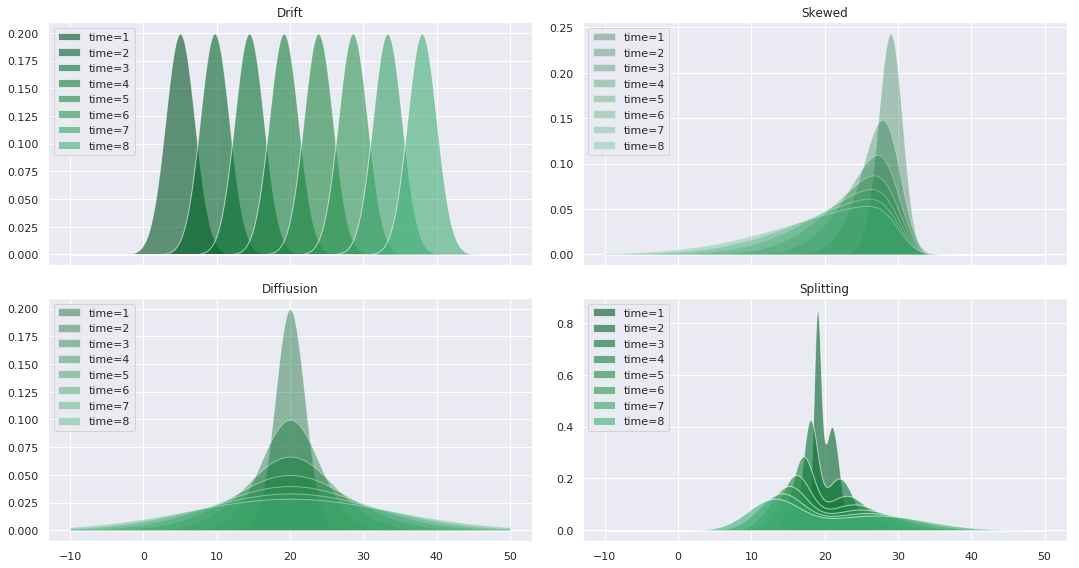

In [19]:
fig, Ax= plt.subplots(2,2, squeeze=True,figsize=(15,8), sharex=True)

x = np.linspace(-10,50,1000)
ax= Ax[0,0]
for i in range(8):
    ax.fill_between(x, norm.pdf(x,loc=5+np.pi*i*1.5, scale=2), alpha=0.6, label='time='+str(i+1),)
ax.legend(loc='upper left')
ax.set_title('Drift')
# plt.title()

y=np.zeros_like(x)
ax= Ax[0,1]
for i in range(8):
    y = skewnorm(-i,loc=30, scale=i*2).pdf(x)
    ax.fill_between(x, y,  alpha=0.3, label='time='+str(i+1), )
ax.set_title('Skewed')
ax.legend(loc='upper left')


x = np.linspace(-10,50,1000)
ax= Ax[1,0]
for i in range(8):
    ax.fill_between(x, norm.pdf(x,loc=20, scale=2*i), alpha=0.4, label='time='+str(i+1),)
ax.legend(loc='upper left')
ax.set_title('Diffiusion')


x = np.linspace(-10,50,1000)
ax= Ax[1,1]
for i in range(8):
#     ax.fill_between(x, norm.pdf(x,loc=20, scale=2*i), alpha=0.4, label='time='+str(i+1),)
    y= norm.pdf(x,loc=20+i, scale=1*i)+norm.pdf(x,loc=20-i, scale=i/2)
    ax.fill_between(x, y , alpha=0.6, label='time='+str(i+1) )
    
ax.legend(loc='upper left')
ax.set_title('Splitting')
plt.tight_layout()

plt.savefig('dynamics.png')

# Tree

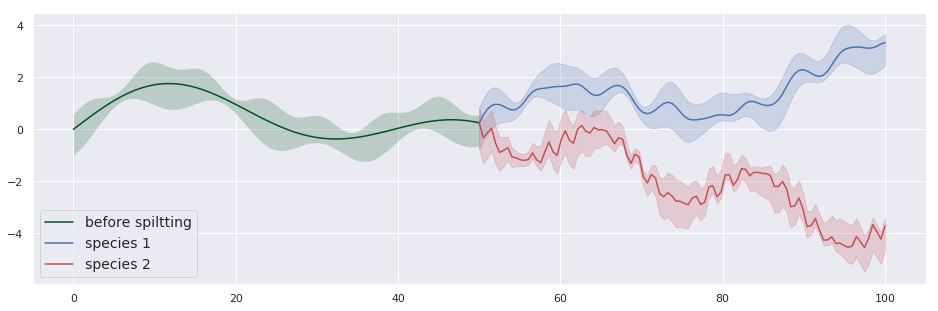

In [60]:
plt.figure(figsize=(16,5))

x = np.linspace(0,50,100)
margin = .6
ampl = 0.4
y0 = 1* np.sin(x/np.pi/2) + np.sin(x/np.pi/4) 
v0 = np.vstack(( y0+ margin+ ampl*np.cos(x*2/np.pi)*np.sin(x*2/np.pi/np.e),\
                 y0- margin- ampl*np.cos(x*2/np.pi/1.23)))

plt.plot(x,y0, label='before spiltting')
plt.fill_between(x,v0[0,:],v0[1,:], alpha=0.2, )


x2 = np.linspace(50,100,100)
y1 = y0[-1]+ np.sin(x/np.pi/2+ 0.4*np.sin(x))+(x2-x2[0])/24
y2 = y0[-1]- np.sin(x*2/np.pi/2+0.4*np.sin(np.pi*x))-(x2-x2[0])/12

v1 = np.vstack(( y1+ margin+ ampl*np.cos(x*2/np.pi)*np.sin(x*2/np.pi/np.e),\
                 y1- margin- ampl*np.cos(x*2/np.pi/1.23)))
v2 = np.vstack(( y2+ margin+ ampl*np.cos(x*2/np.pi)*np.sin(x*2/np.pi/np.e),\
                 y2- margin- ampl*np.cos(x*2/np.pi/1.23)))


plt.plot(x2,y1,'b', label='species 1')
plt.plot(x2,y2,'r', label='species 2')
plt.fill_between(x2,v1[0,:],v1[1,:], alpha=0.2,color='b' )
plt.fill_between(x2,v2[0,:],v2[1,:], alpha=0.2,color='r' )

plt.legend(loc='lower left',fontsize=14)
plt.savefig('split.png')

In [17]:
v0.shape

(2, 100)

In [244]:
q.shape

(2, 200)